# Mudcard
- **how is this related to the datasets that we use for our projects?**
    - you will train several ML models using your project dataset so you'll need to choose an evaluation metric
- **I'm just wondering why we don't use Pearson correlation to calculate the linear correlation. Is it positively correlated to F-test?**
    - the pearson correlation coefficient can only be calculated between two continuous variables
    - if your target variable or the feature is categorical, it shouldn't be used
    - the f test is more general
- **how do we determine p_critical?**
    - you will see in the next problem set
    - you choose an evaluation metric (e.g., accuracy), you loop through various p_crit values, and you select the p_crit which maximizes accuracy
- **"When using a real dataset in and trying to find the best evaluation metric through the confusion matrix, how to we find the y_pred that was utilized throughout the python coding? In the examples in class, the y_pred was provided but I am not sure how to do that in real data examples.**
    - after you train an ML model, you can use it to generate predictions
    - we will put together our first ML pipeline in a week and I hope everything we covered so far will fall into place then
- **what is imbalanced dataset?**
    - a classification dataset in which most of the data points belong to one class
    - e.g., fraud detection in credit card transactions is imbalanced because 99.9% of transactions are not fraudulant, and only 0.1% of transactions are

## Evaluation metrics in supervised ML, part 2, predicted probabilities and regression metrics

By the end of this lecture, you will be able to
- Summarize the ROC and precision-recall curves, and the logloss metric
- Describe the most commonly used regression metrics


## <font color='LIGHTGRAY'> Evaluation metrics in supervised ML, part 2, predicted probabilities and regression</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **Summarize the ROC and precision-recall curves, and the logloss metric**
- <font color='LIGHTGRAY'>Describe the most commonly used regression metrics</font>


### The ROC curve
- Receiver Operating Characteristic
   - x axis: false positive rate (fpr = FP / (FP + TN))
   - y axis: true positive rate (R = TP / (TP + FN)) - recall
   - Developed in World War II for Radar.
   - the curve shows fpr and R value pairs for various class 1 critical probabilities
- upper left corner: perfect predictor
- diagonal point: chance level predictions
- lower right corner: worst predictor

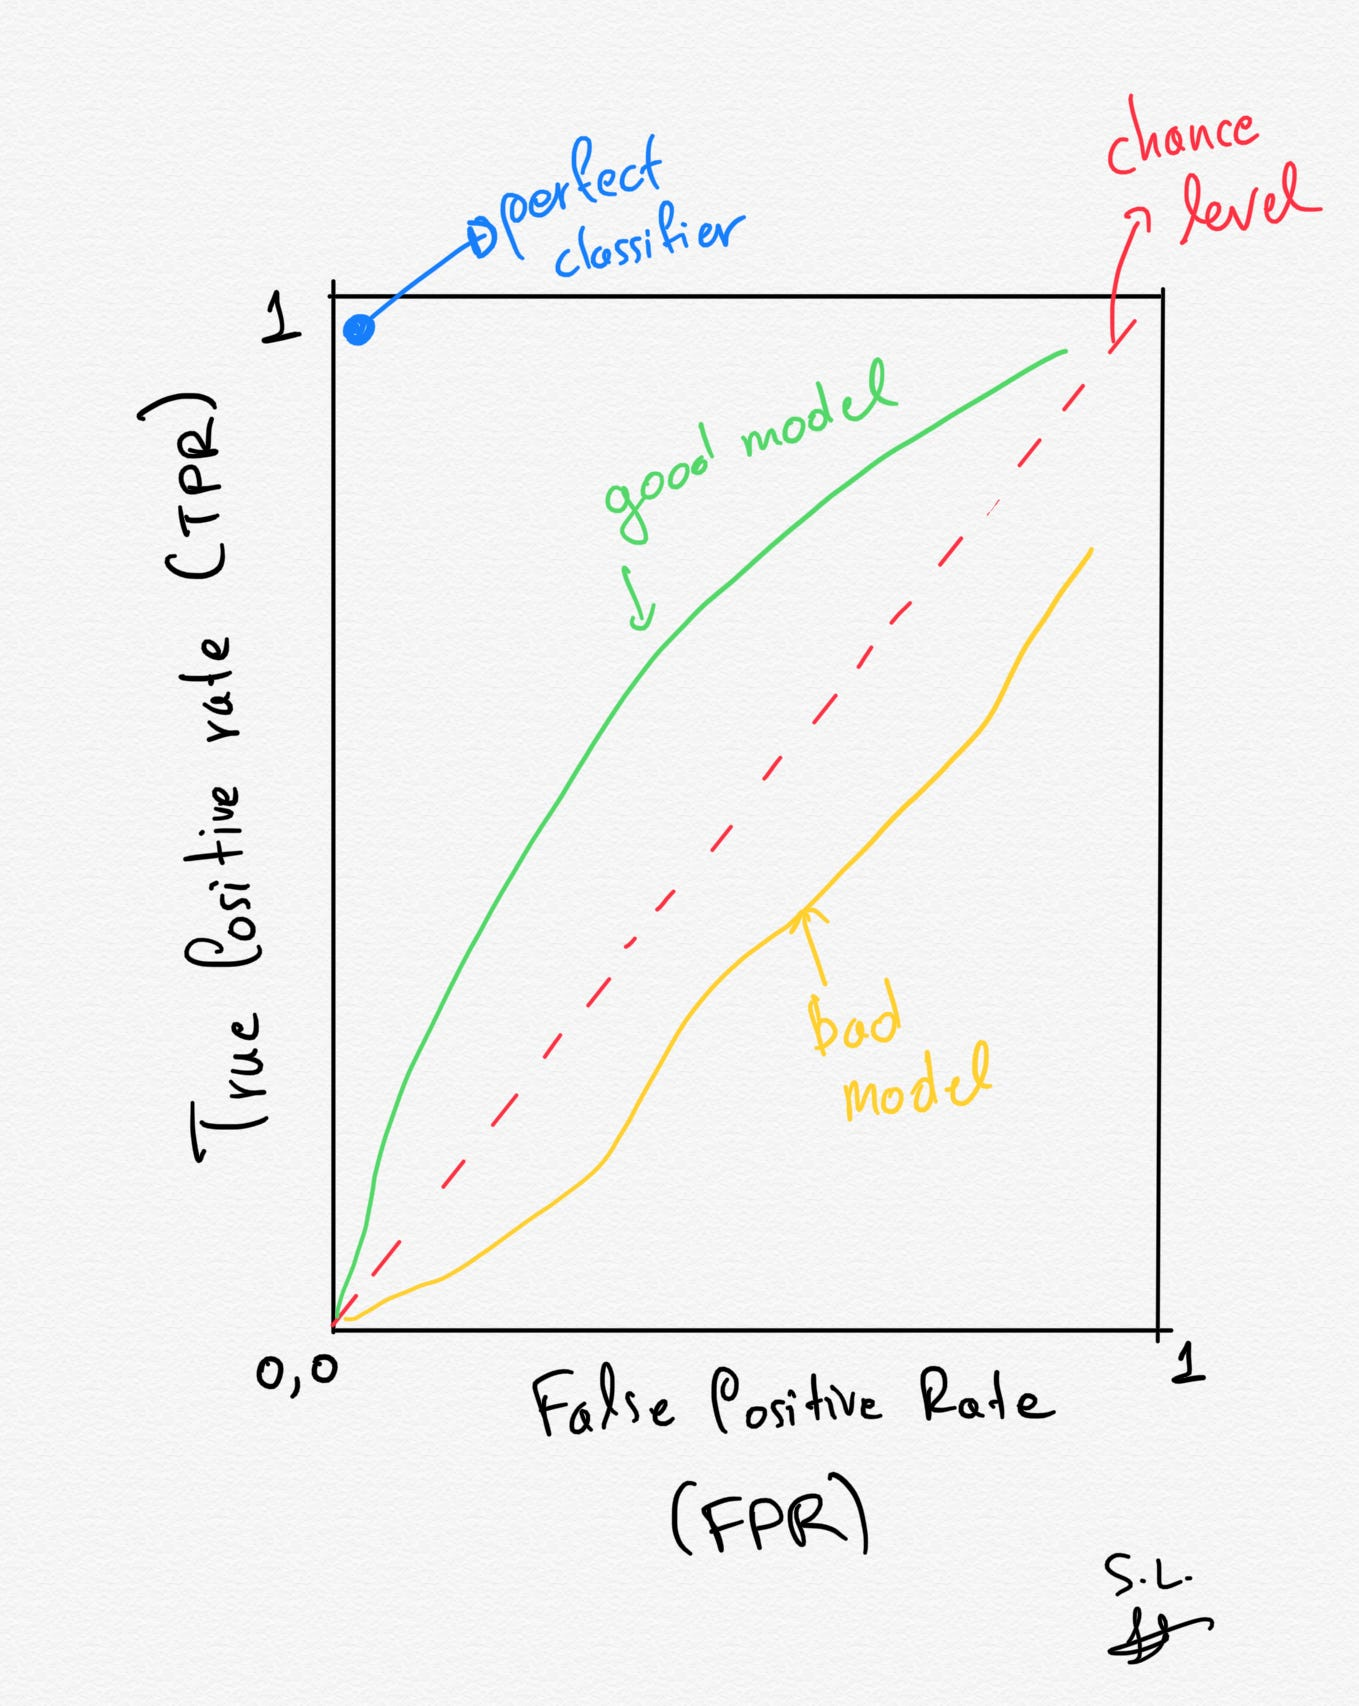

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
df = pd.read_csv('data/true_labels_pred_probs.csv')

y_true = df['y_true']
pred_prob_class1 = df['pred_prob_class1']
pred_prob_class0 = df['pred_prob_class0']

fpr = np.zeros(len(y_true))
tpr = np.zeros(len(y_true))

# serve as threshold
p_crits = np.sort(pred_prob_class1) # the sorted predicted probabilities serve as critical probabilities

for i in range(len(p_crits)):
    p_crit = p_crits[i]
    
    y_pred = np.zeros(len(y_true))
    y_pred[pred_prob_class1 <= p_crit] = 0
    y_pred[pred_prob_class1 > p_crit] = 1
    
    C = confusion_matrix(y_true,y_pred) 
    
    tpr[i] = C[1,1]/(C[1,0]+C[1,1])
    fpr[i] = C[0,1]/(C[0,0]+C[0,1])

from sklearn.metrics import roc_curve
# # the roc_curve function performs the same calculation
fpr,tpr,p_crits = roc_curve(y_true,pred_prob_class1)


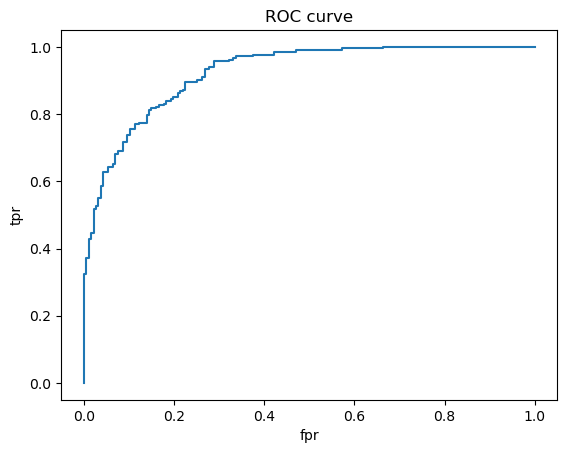

In [2]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## Quiz 1
What's the (fpr,tpr) coordinate on the ROC curve if p_crit = 1?


**Answer:** If p_crit = 1, all points are predicted class 0. (y_pred(pred_prob_class1 <= p_crit) = 0)

- TN = x (some number)
- FN = y (some other number)
- FP = 0, TP = 0
- fpr = 0 / (0 + x) = 0
- tpr = 0 / (0 + y) = 0

So the correct answer is (0, 0).

This means when we gradually increase p_crit, it will move from the top right corner to the bottom left corner. r is (0, 0).

## ROC AUC
- ROC is useful but it is not a single number metric
   - it cannot be directly used to compare various classification models
- summary statistics based on the ROC curve (for a complete list, see [here](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Further_interpretations))
- the intercept of the ROC curve with the line at 45 degrees orthogonal to the no-discrimination line - the balance point where Sensitivity (TPR, recall)= 1 – Specificity (TNR) (??)
- most commonly used metric is ROC AUC - ROC Area Under the Curve
   - AUC = 1 is a perfect classifier
   - AUC > 0.5 is above chance-level predictor
   - AUC = 0.5 is a chance-level classifier
   - AUC < 0.5 is a bad predictor
   - AUC = 0 classifies all points incorrectly

In [3]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_true,pred_prob_class1))

0.9236524315231854


## Precision-recall curve
- the drawback of ROC is that it uses TN, not good for imbalanced problems.
- the precision-recall curve doesn't use TN, ideal for imbalanced problems.

In [4]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score # the AUC of the P-R curve

p,r,p_crits = precision_recall_curve(y_true,pred_prob_class1)

print(average_precision_score(y_true,pred_prob_class1))

0.9315588971251672


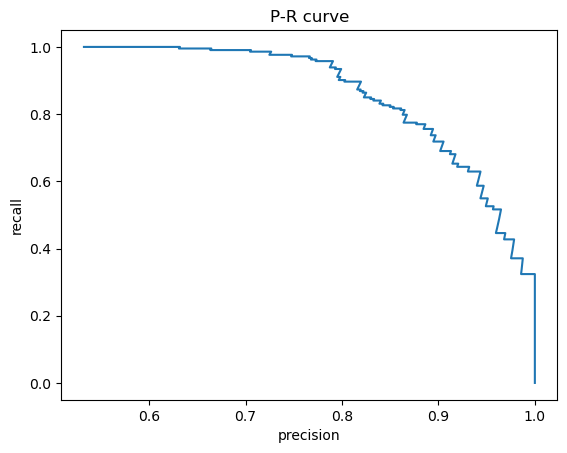

In [5]:
plt.plot(p,r)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('P-R curve')
plt.show()


## Quiz 2
What's the (p,r) coordinate on the curve if p_crit = 0?

**Answer:** If p_crit = 0, all points are predicted class 1. (y_pred(pred_prob_class1 <= p_crit) = 0)

- TN = 0, FN = 0 (some other number)
- FP = x (some number), TP = y (some other number)
- recall = tpr = 1, 
- precision = TP / (TP+FP) = y/(x+y), this coordinate is ill-defined and depends on the dataset you use.

So we don't know exactly the answer! The correct answer is (the fraction of points in class 1, 1) which depends on the dataset you use.0, 0).

## The logloss metric (cross-entropy loss)

### <center>$logloss = - \frac{1}{N}\sum (y_{true}\ln(p_{pred}) + (1-y_{true})\ln(1-p_{pred}))$</center>
- $p_{pred}$ is the predicted probability of the **positive class**
- the predicted probabilities are not converted into predicted classes
- excellent choice if you need accurate probabilities (e.g., when it is expensive/costly to act due to limited resources so you need to rank your points based on probabilities)
- two scenarios (for binary classification):
   - y_true = 0 - left term disappears
   - y_true = 1 - right term disappears
- log(0) is undefined
   - $p_{pred}$ is replaced with $\max(\min(p,1-10^{-15}),10^{-15})$ to avoid this issue
- We need to minimize this metric.

### The extreme cases
- the classifier is confidently wrong
   - $p_{pred} = 10^{-15}$ for points in class 1
   - $p_{pred} = 1 - 10^{-15}$ for points in class 0
<center>$logloss = -\frac{1}{N}\sum \ln(10^{-15}) = -\ln(10^{-15})$</center>
<center> $logloss \sim  34.5  $</center>

- the classifier is correct
   - $p_{pred} = 10^{-15}$ for points in class 0 (predicted probabiliy close to 0 for true class 0)
   - $p_{pred} = 1 - 10^{-15}$ for points in class 1
<center>$logloss = -\frac{1}{N}\sum (1-0)(1-\ln(1-10^{-15})) = 10^{-15}$ for class 0</center>
<center>$logloss = -\frac{1}{N}\sum 1*\ln(1-10^{-15}) = 10^{-15}$ for class 1</center>
<center>$logloss \sim 0$</center>

- The closer to zero the logloss, the better the result

In [6]:
from sklearn.metrics import log_loss
print(log_loss(y_true,pred_prob_class1))
help(log_loss)

0.3501519054532857
Help on function log_loss in module sklearn.metrics._classification:

log_loss(y_true, y_pred, *, eps='auto', normalize=True, sample_weight=None, labels=None)
    Log loss, aka logistic loss or cross-entropy loss.
    
    This is the loss function used in (multinomial) logistic regression
    and extensions of it such as neural networks, defined as the negative
    log-likelihood of a logistic model that returns ``y_pred`` probabilities
    for its training data ``y_true``.
    The log loss is only defined for two or more labels.
    For a single sample with true label :math:`y \in \{0,1\}` and
    a probability estimate :math:`p = \operatorname{Pr}(y = 1)`, the log
    loss is:
    
    .. math::
        L_{\log}(y, p) = -(y \log (p) + (1 - y) \log (1 - p))
    
    Read more in the :ref:`User Guide <log_loss>`.
    
    Parameters
    ----------
    y_true : array-like or label indicator matrix
        Ground truth (correct) labels for n_samples samples.
    
    

## <font color='LIGHTGRAY'> Evaluation metrics in supervised ML, part 2, predicted probabilities and regression</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Summarize the ROC and precision-recall curves, and the logloss metric</font>
- **Describe the most commonly used regression metrics**


## Regression metrics
- the target variable is continuous
- the predicted values are also continuous
- regression metrics measure some type of difference between y (true values) and y' (predicted values)

### Mean Squared Error 

### <center>$MSE(y,y') = \frac{1}{n}\sum_{i=1}^{n}(y_i-y_i')^2$</center>

<center><img src="figures/polifit_1.jpg" width="450"></center>

#### The unit of MSE is not the same as the target variable.

### Root Mean Square Error

### <center>$RMSE(y,y') = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-y_i')^2}$</center>


### Mean Absolute Error

### <center>$MAE(y,y') = \frac{1}{n}\sum_{i=1}^{n}|y_i-y_i'|$</center>

#### Both RMSE and MAE have the same unit as the target variable.


## R2 score - coefficient of determination

### <center>$R^2(y,y') = 1 - \frac{\sum_{i=1}^{n}(y_i-y_i')^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$,</center>
<center>where $\bar{y}$ is the mean of $y$.</center>

- R2 = 1 is the perfect regression model ($y == y'$)
- R2 = 0 is as good as a constant model that always predicts the expected value of y ($\bar{y}$)
- R2 < 0 is a bad regression model (iid assumption not holds in ML)
- R2 = RSS (sum of squares of residual) / TSS =	(total sum of squares)
- Here y' is the predicted value, y is the true label, y_mean is the mean of y.

#### R2 is dimensionless. (no units)

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

help(mean_squared_error) # change squared to False for RMSE

Help on function mean_squared_error in module sklearn.metrics._regression:

mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)
    Mean squared error regression loss.
    
    Read more in the :ref:`User Guide <mean_squared_error>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    multioutput : {'raw_values', 'uniform_average'} or array-like of shape             (n_outputs,), default='uniform_average'
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
    
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
    


- RMSE is not implemented in sklearn, but you can calculate it as `np.sqrt(mean_squared_error(y_true,y_pred))`
- you can find more on regression metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

## Quiz 3
Read in `data/reg_preds.csv`. It contains two columns: 

- y_true: value of owner-occupied homes in $1000's in Boston
- y_pred: predictions of a regression model

What's the ratio between the MSE and the variance of the home values? How does this ratio relate to the R2 score?

In [12]:
data = pd.read_csv('data/reg_preds.csv')
n = data.shape[0]

mse = mean_squared_error(data['y_true'], data['y_pred'])
variance = np.var(data['y_true'])
print('MSE:', mse, 'Variance:', variance)

RSS = n* mse
TSS = n* variance
R2 = r2_score(data['y_true'], data['y_pred'])
print('R2:', R2, 1-RSS/TSS)

MSE: 6.406807515080281 Variance: 55.92169165705498
R2: 0.8854325159837684 0.8854325159837684


## Mudcard